#### Use Machine learning to predict the price of a car based on several characteristics. The objective is to build a model understand the factors that drive the car of the price. This will help your automobile company launch their new car in the market effectively by pricing it better.
    Tasks:
        - Perform EDA on the data
        - Perform data cleanup as required
        - Pick the best variable for making a simple linear regression model
        - Perform train test split
        - Build model using best variable and report the R2
        - Make a multiple regression model
        - Apply feature selection approaches discussed in the class
        - Final model should be interpretable
        - What is your understanding of the factors that drive price?

In [1]:
# Importing some basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [293]:
# Read the dataset
df= pd.read_csv('AutoData (1).csv')
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [294]:
df.shape

(205, 25)

### - Perform EDA on the data
### - Perform data cleanup as required

In [295]:
#Splitting company name from model column
company = df['make'].apply(lambda x : x.split(' ')[0])

# Inserting new column company to the dataset
df.insert(0,"company",company)

# Drop the make column
df.drop(['make'],axis=1,inplace=True)

In [296]:
df.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### Observation-
    * A number of Company name is spelled incorrectly.
    * Few names are same eventhough due to camelcase, they are identified as unique(ex:- Nissan)

In [297]:
# Bringing the company name to lowercase
df.company= df.company.str.lower()

In [298]:
# Correcting the Company name

def replace_name(a,b):
    df.company.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

In [299]:
# Unique company name in dataset
df.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [300]:
#Checking for duplicates
df.loc[df.duplicated()]

,company,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [301]:
# Copy of Dataset
df1= df.copy()
df2= df.copy()

In [302]:
# Seperating object and numerical data types 
obj = []
num = []
for col in df.columns:
    if df[col].dtype=='object':
        obj.append(col)
    else:
        num.append(col)

In [303]:
print("Categorical features:",obj)
print("Numerical features:",num)

Categorical features: ['company', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
Numerical features: ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [304]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<Figure size 576x216 with 0 Axes>

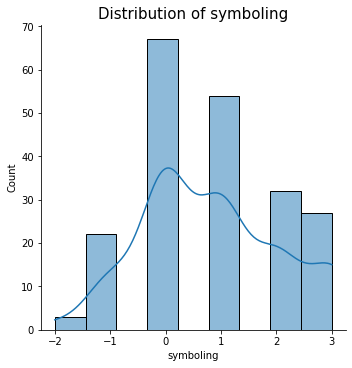

<Figure size 576x216 with 0 Axes>

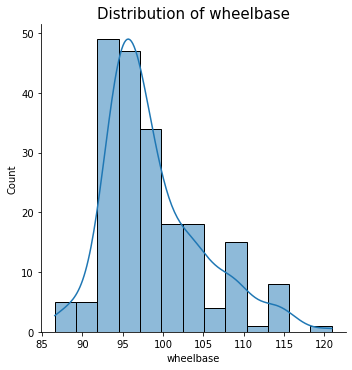

<Figure size 576x216 with 0 Axes>

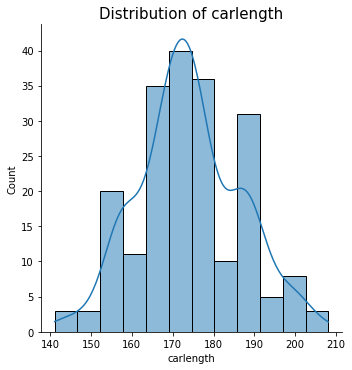

<Figure size 576x216 with 0 Axes>

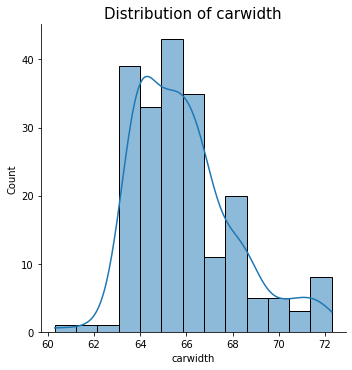

<Figure size 576x216 with 0 Axes>

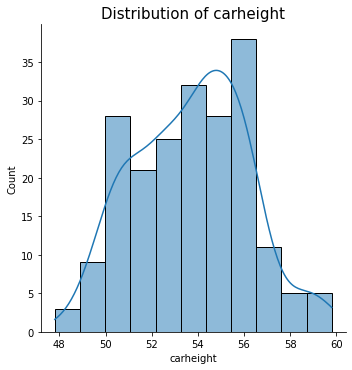

<Figure size 576x216 with 0 Axes>

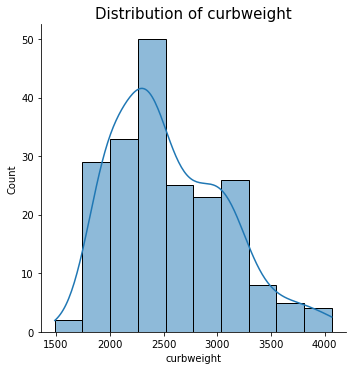

<Figure size 576x216 with 0 Axes>

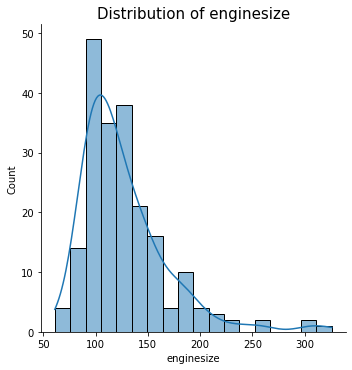

<Figure size 576x216 with 0 Axes>

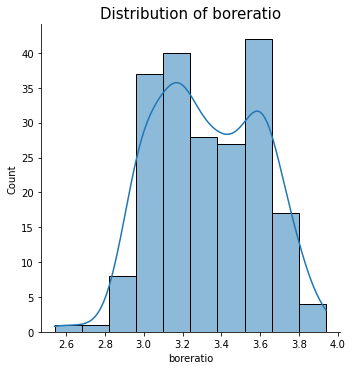

<Figure size 576x216 with 0 Axes>

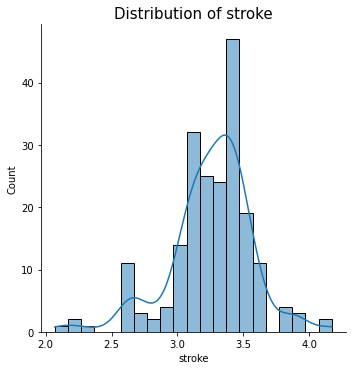

<Figure size 576x216 with 0 Axes>

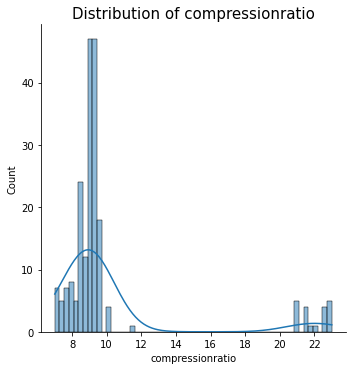

<Figure size 576x216 with 0 Axes>

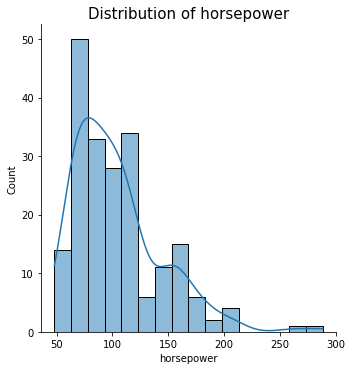

<Figure size 576x216 with 0 Axes>

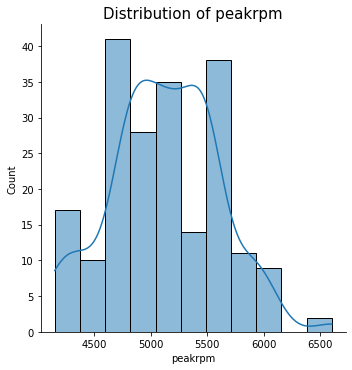

<Figure size 576x216 with 0 Axes>

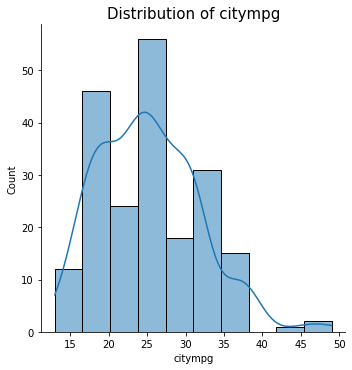

<Figure size 576x216 with 0 Axes>

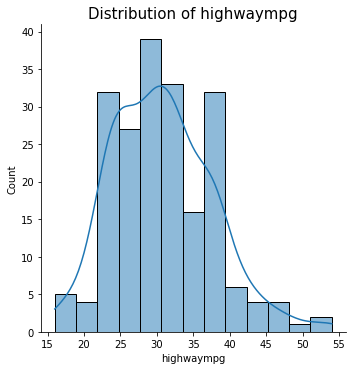

<Figure size 576x216 with 0 Axes>

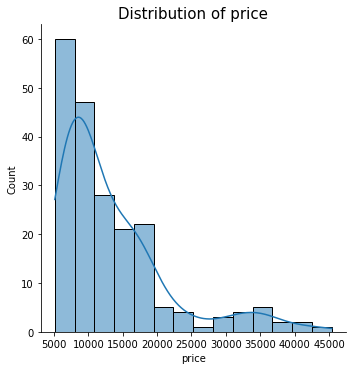

In [305]:
# "Distribution" Plot of "Numerical Features"

for col in num[:]:
    plt.figure(figsize=(8,3))
    sns.displot(df[col], kde= True) 
    plt.title("Distribution of "+col,fontsize=15)
    plt.show()
    
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Observations:-
    * Symboling is Categorical, 0 & 1 symboling is dominant and -1, -2 are rarely preferred.
    * Wheelbase is right skewed, Most of the data points lies within 75 Percentile.
    * Carlength is nearly normally distributed.
    * Carwidth between 63-67 is highly preferred.
    * Most preferred carheight lies between 50-51, and 53-57.
    * Curbweight between 2200-2500 is highly preferred.
    * Enginesize is right skewed and most of the data points lies within 75 percentile.
    * Bore Ratio- Most preferred:3.6, followed by 3.2 then 3.0
    * Stroke- Most of the data points are very close to mean and few data points are very far away from mean.
    * Compression Ratio- Majority lies within the Mean and few datapoints are at maximum i.e; 23.
    * Horsepower- Right skewed, Maximum is very far from Mean.
    * Peak RPM- Nearly Normally distributed, eventhough most of datapoints lies within 75 percentile.
    * City MPG- Slightly Right Skewed, as maximum lies 4 std above the mean.
    * Highway MPG- Nearly Normally distributed.
    * Price- Right Skewed, Most of the frequent data points lies within 85 percentile.
            . We can also see another bell curve b/w ~30000 to 45000.

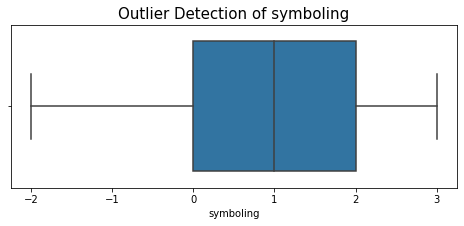

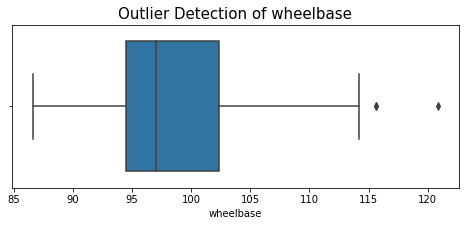

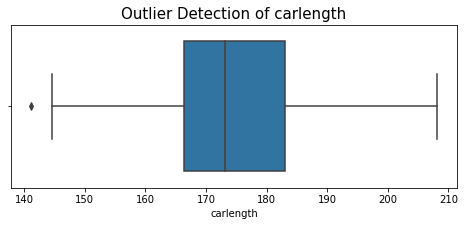

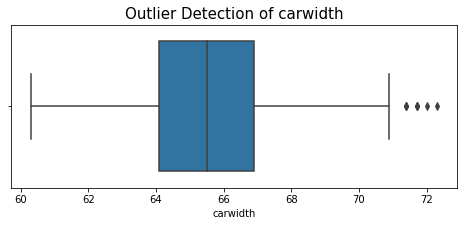

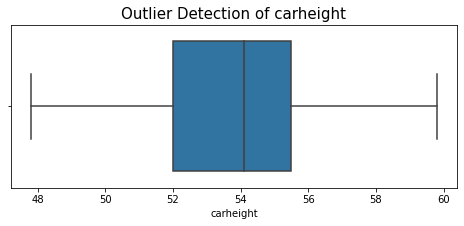

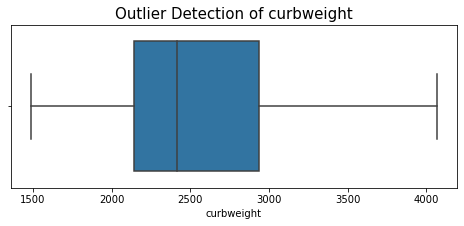

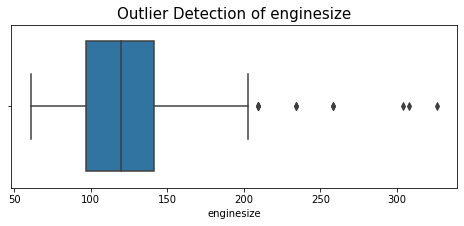

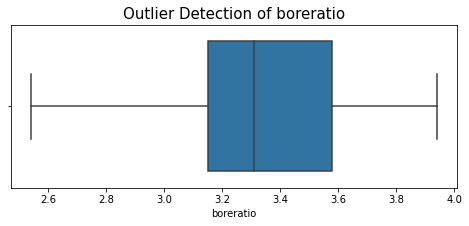

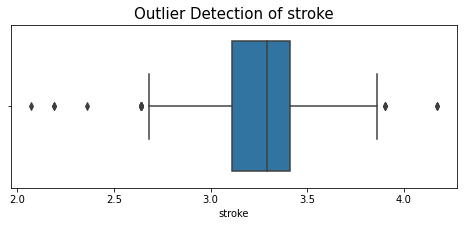

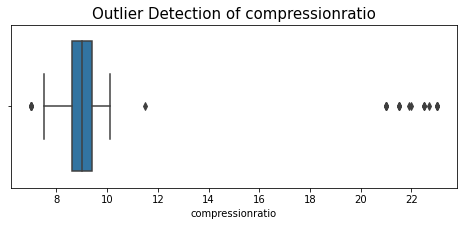

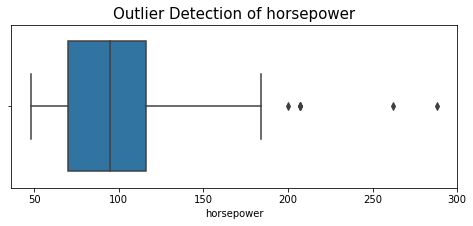

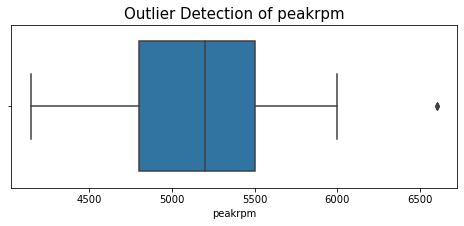

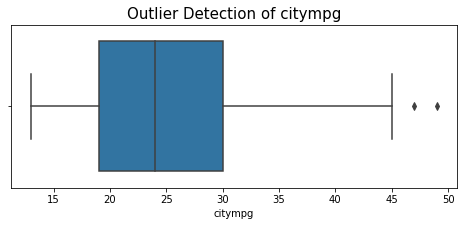

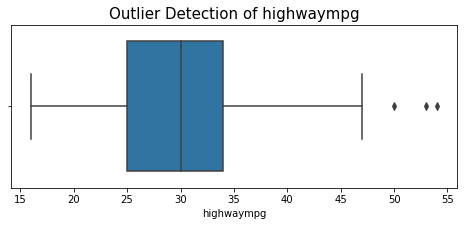

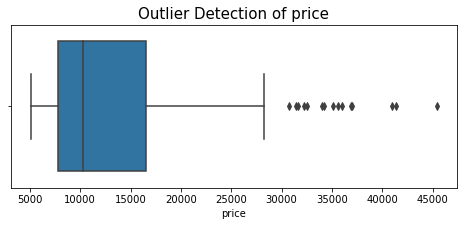

In [306]:
# "Boxplot" of "Numerical Features"

for col in num[:]:
    plt.figure(figsize=(8,3))
    sns.boxplot(x= df[col]) 
    plt.title("Outlier Detection of "+col,fontsize=15)
    plt.show()
    
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Observations-
    * Symboling is a categorical variable, it doesn't have outliers.
    * Wheel Base, Car Length, Car Width, Engine Size, Stroke, Compression Ratio, Horse Power, Peak RPM, City MPG, 
        Highway MPG & Price have Outliers.
    * Car Height, Curb Weight & Bore Ratio doesn't have Outliers.

In [307]:
# Number of "Companies" Present in the dataset.
print('No. of different Companies:',len(df.company.unique()))

No. of different Companies: 22


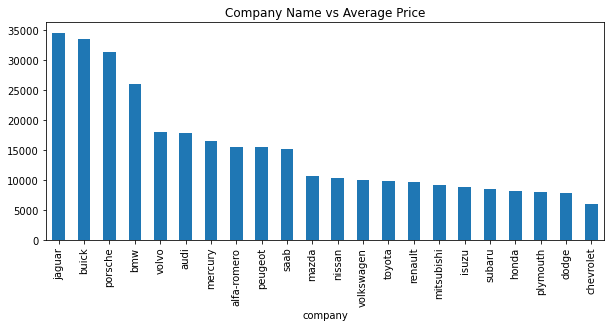

In [308]:
# "Company" V/s "Price"
plt.figure(figsize=(10,4))
df.groupby(['company'])['price'].mean().sort_values(ascending = False).plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

### Observation-
    * Jaguar is dominating the market(in terms of price) followed by Buick, Porsche & BMW.
    * Chevrolet is least priced in the market.

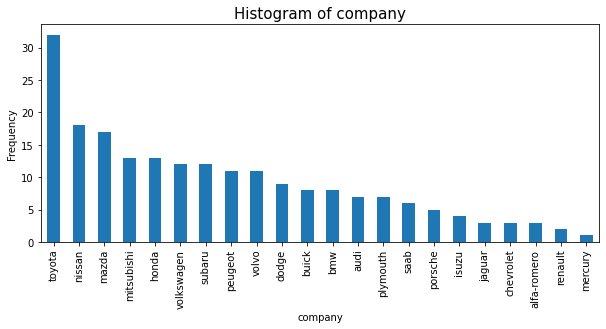

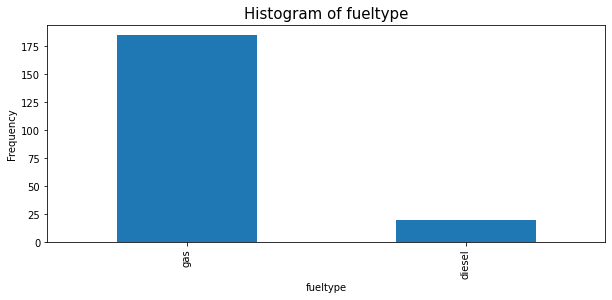

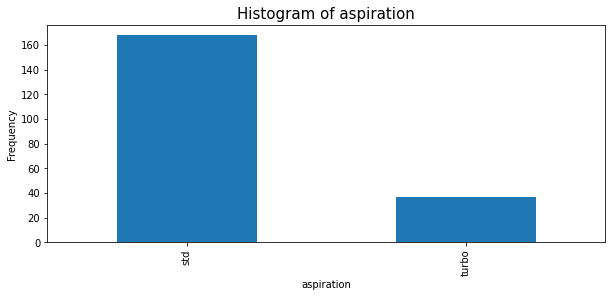

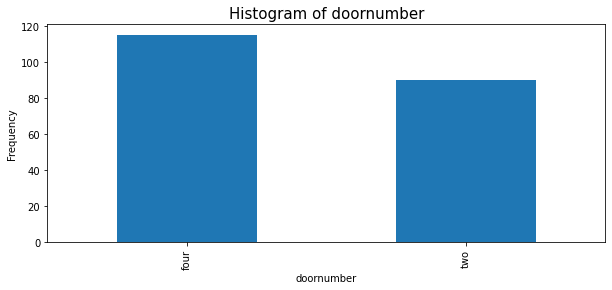

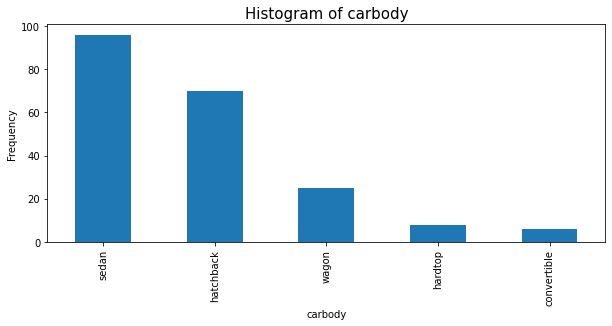

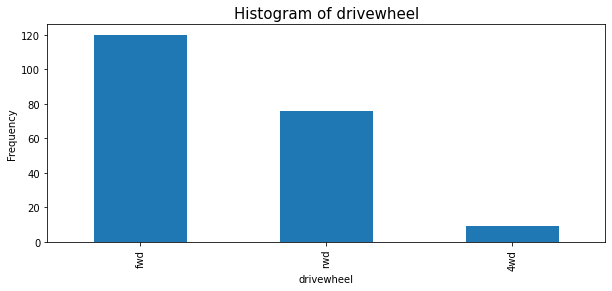

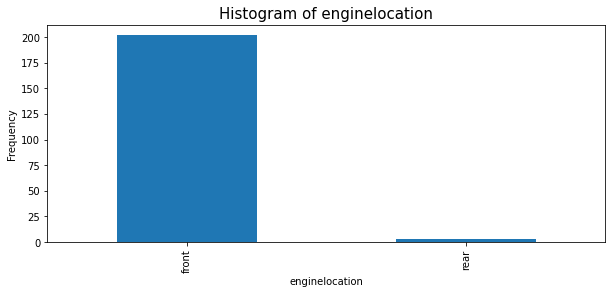

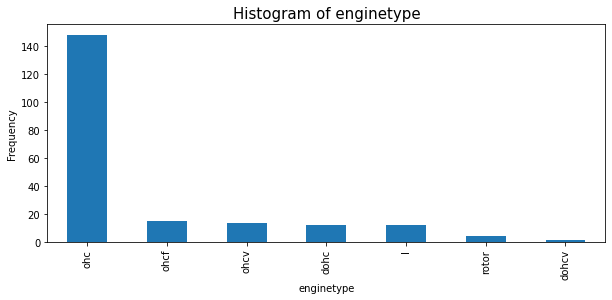

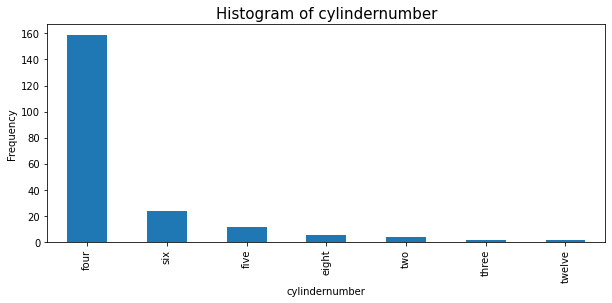

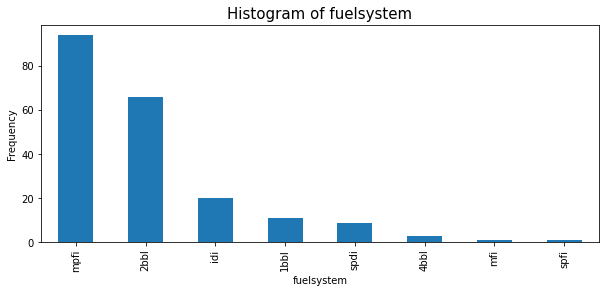

In [309]:
# Categorical Feature's "Frequency"

for col in obj[:]:
    plt.figure(figsize=(10,4))
    df[col].value_counts().plot(kind= 'bar')
    plt.title("Histogram of "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Frequency",fontsize=10)
    plt.show()

### Observations-
    * Highest Selling:-
        . Company- Toyota
        . Fuel Type- Gas
        . Aspiration- STD
        . Door Number- 4
        . Car Body- Sedan
        . Drive Wheel- FWD
        . Engine Location- Front
        . Engine Type- OHC
        . Cylinder Number- 4
        . Fuel System- MPFI
    * Least Selling:-
        . Company- Mercury
        . Fuel Type- Diesel
        . Aspiration- Turbo
        . Door Number- 2
        . Car Body- Convertible
        . Drive Wheel- 4WD
        . Engine Location- Rear
        . Engine Type- DOHCV
        . Cylinder Number- 12
        . Fuel System- SPFI 

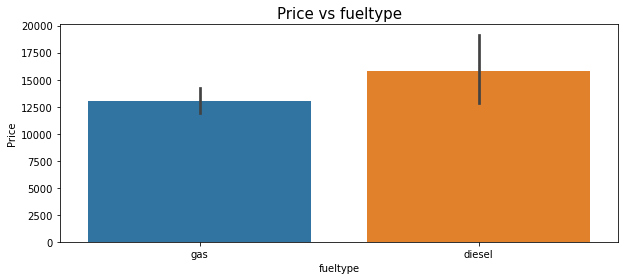

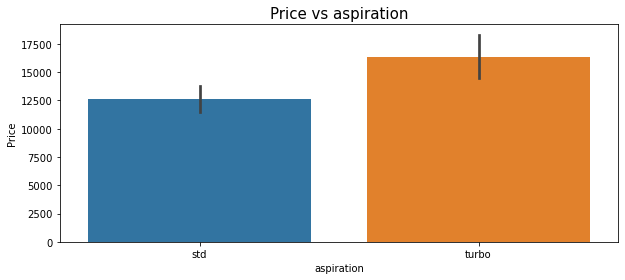

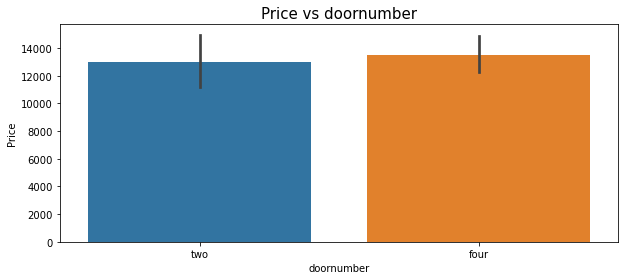

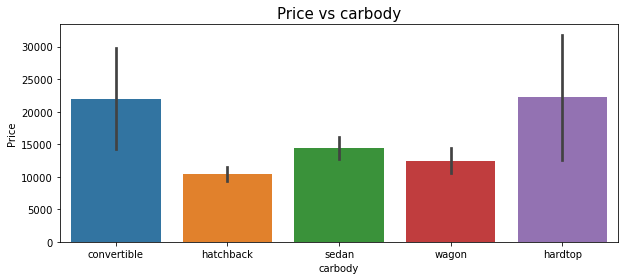

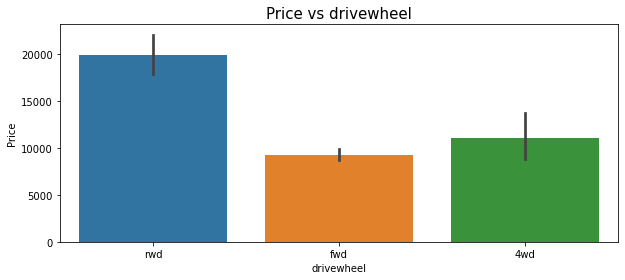

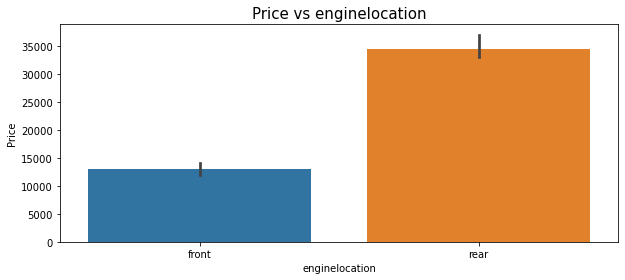

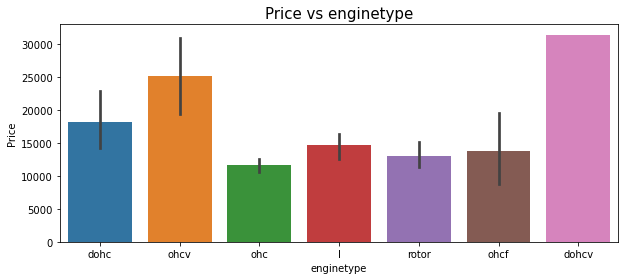

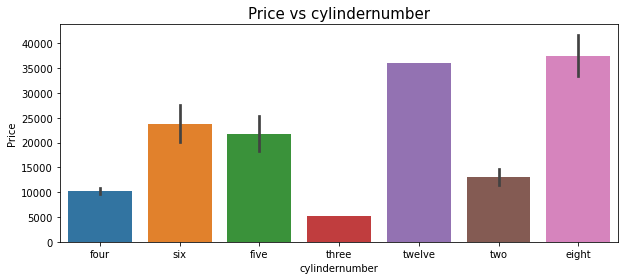

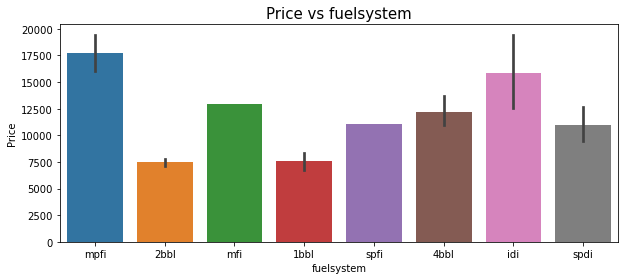

In [310]:
# "Price" V/s "Categorical Features"

for col in obj[1:]:
    plt.figure(figsize=(10,4))
    sns.barplot(x= df[col],y= df["price"])
    plt.title("Price vs "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Price",fontsize=10)
    plt.show()

### Observations-
    * High Price:-
        * Diesel Engine
        * Aspiration (Turbo)
        * Door number (Four)
        * Carbody (Convertible)
        * Drive wheel (RWD)
        * Engine Location (Rear)
        * Engine Type (DOHCV)
        * 8 Cylinder followed by 12 Cylinder
        * Fuel System (MPFI) followed by IDI.

### Visualization of "Numerical Features" in terms of "Price"

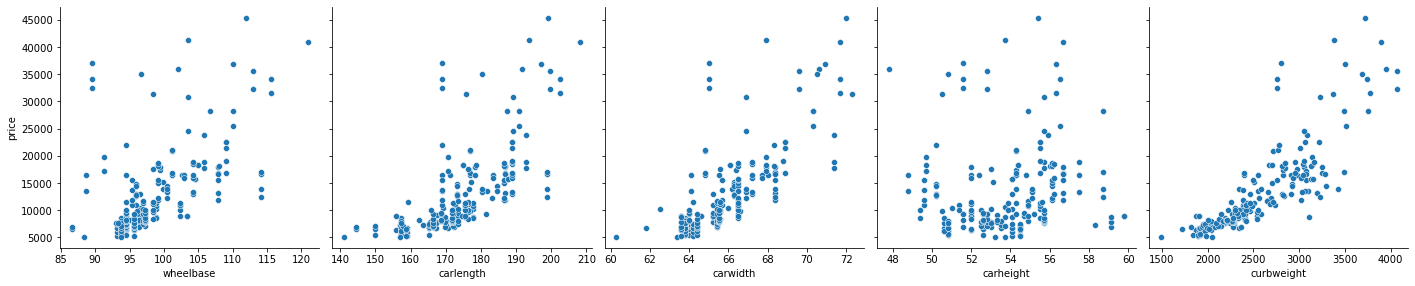

In [311]:
# Visualization of Numerical Features in terms of Price
sns.pairplot(df, x_vars=['wheelbase','carlength','carwidth','carheight','curbweight'], y_vars='price',size=4, aspect=1, kind='scatter')
plt.show()

### Observations-
    * wheelbase, carlength, carwidth & curbweight are +Vely Correlated with Car Price. 

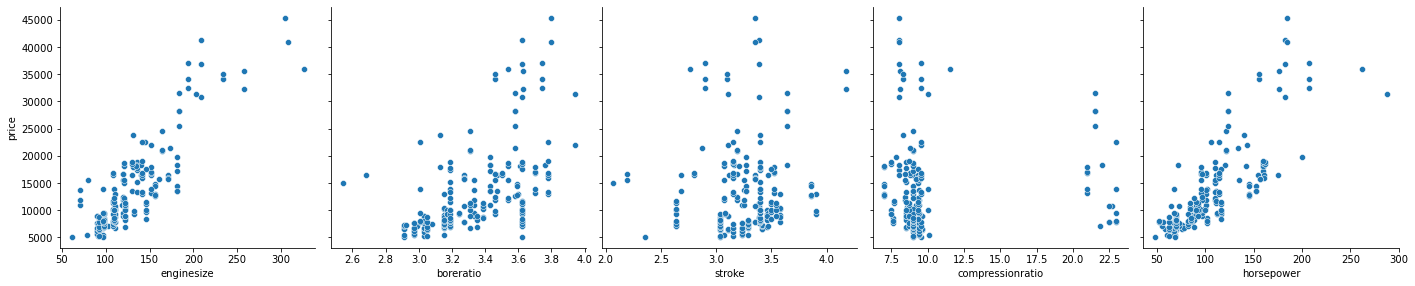

In [312]:
# Visualization of Numerical Features in terms of Price
sns.pairplot(df, x_vars=['enginesize','boreratio', 'stroke', 'compressionratio','horsepower'], y_vars='price',size=4, aspect=1, kind='scatter')
plt.show()

### Observations-
    * enginesize, boreratio, horsepower are +vely correlated with Car Price.

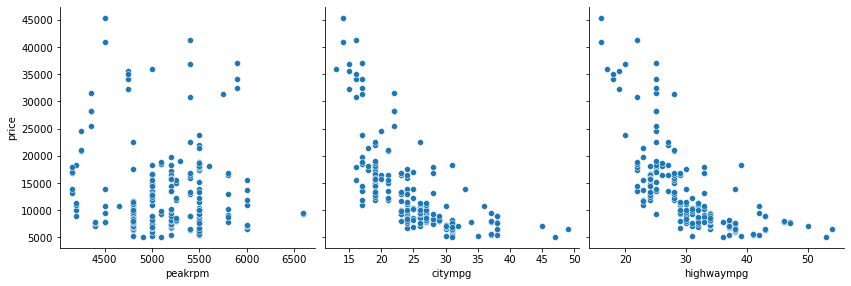

In [313]:
# Visualization of Numerical Features in terms of Price
sns.pairplot(df, x_vars=['peakrpm', 'citympg', 'highwaympg'], y_vars='price',size=4, aspect=1, kind='scatter')
plt.show()

### Observations-
            * citympg, highwaympg are -vely correlated with Car price,

In [314]:
df.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


# Important Features by looking into correlation(Without Feature Engineering)
    * wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, horsepower, citympg, highwaympg

### Categorical Feature Encoding:-

#### Mapping the Categorical Features to  Average Price of Respective object in each Category.
#### Count/ Frequency Encoding is not efficient if some of the labels have the same count, then they will be replaced with the same count and they will loose some valuable information.

In [315]:
# Average Price of Each "Company"
companyprice_map= df.groupby(['company'])['price'].mean().to_dict()

# Map the Average Price of "Company" to the "Company" Column
df.company= df.company.map(companyprice_map)
#-----------------------------------------------------------------------------------------
# Average Price of Each "enginetype"
enginetype_price_map= df.groupby(['enginetype'])['price'].mean().to_dict()

# Map the Average Price of "Engine Type" to the "enginetype" Column
df.enginetype= df.enginetype.map(enginetype_price_map)
#-----------------------------------------------------------------------------------------
# Average Price of "Cylinder Number"
cylinderNo_price_map= df.groupby(['cylindernumber'])['price'].mean().to_dict()

# Map the Average Price of "Cylinder Number" to the "cylindernumber" Column
df.cylindernumber= df.cylindernumber.map(cylinderNo_price_map)
#-----------------------------------------------------------------------------------------
# Average Price of Each "fuelsystem"
fuelsystem_price_map= df.groupby(['fuelsystem'])['price'].mean().to_dict()

# Map the Average Price of "fuelsystem" to the "fuelsystem" Column
df.fuelsystem= df.fuelsystem.map(fuelsystem_price_map)

#### Count/Frequency Encoding

In [316]:
# Frequency of labels in 'carbody' column
carbody_freq_map= df.carbody.value_counts().to_dict()

# Map the frequency of 'carbody' to the 'carbody' Column
df.carbody= df.carbody.map(carbody_freq_map)
#-----------------------------------------------------------------------------------------
# Frequency of labels in 'drivewheel' column
drivewheel_freq_map= df.drivewheel.value_counts().to_dict()

# Map the frequency of 'carbody' to the 'carbody' Column
df.drivewheel= df.drivewheel.map(drivewheel_freq_map)

#### One-Hot Encoding

In [317]:
# "OHE" for those Categories which have only Two Lables
df= pd.get_dummies(df, columns = ['fueltype', 'aspiration', 'doornumber', 'enginelocation'], drop_first= True)

In [318]:
df.corr()

,company,symboling,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_gas,aspiration_turbo,doornumber_two,enginelocation_rear
company,1.000000,-0.123315,-0.063945,-0.388502,0.544494,0.609220,0.680698,0.186132,0.725252,0.336297,...,0.133186,0.648787,-0.124044,-0.549466,-0.561412,0.895520,-0.152614,0.109832,-0.047270,0.309482
symboling,-0.123315,1.000000,-0.193211,0.110760,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,0.032537,...,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978,0.194311,-0.059866,0.664073,0.212471
carbody,-0.063945,-0.193211,1.000000,0.187899,0.092560,0.008815,0.020876,-0.037251,-0.111291,-0.082740,...,0.084066,-0.105349,0.016433,0.134588,0.149356,-0.086283,-0.082914,0.040728,-0.232182,-0.275601
drivewheel,-0.388502,0.110760,0.187899,1.000000,-0.317381,-0.365345,-0.325973,-0.147413,-0.517996,-0.252709,...,-0.000842,-0.391698,0.141364,0.462915,0.510766,-0.430127,0.034831,-0.152048,0.019579,-0.097701
wheelbase,0.544494,-0.531954,0.092560,-0.317381,1.000000,0.874587,0.795144,0.589435,0.776386,0.217609,...,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,-0.308346,0.257611,-0.447357,-0.187790
carlength,0.609220,-0.357612,0.008815,-0.365345,0.874587,1.000000,0.841118,0.491029,0.877728,0.317358,...,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920,-0.212679,0.234539,-0.398568,-0.050989
carwidth,0.680698,-0.232919,0.020876,-0.325973,0.795144,0.841118,1.000000,0.279210,0.867032,0.428164,...,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325,-0.233880,0.300567,-0.207168,-0.051698
carheight,0.186132,-0.541038,-0.037251,-0.147413,0.589435,0.491029,0.279210,1.000000,0.295572,-0.091519,...,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336,-0.284631,0.087311,-0.552208,-0.106234
curbweight,0.725252,-0.227691,-0.111291,-0.517996,0.776386,0.877728,0.867032,0.295572,1.000000,0.509248,...,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305,-0.217275,0.324902,-0.197379,0.050468
enginetype,0.336297,0.032537,-0.082740,-0.252709,0.217609,0.317358,0.428164,-0.091519,0.509248,1.000000,...,-0.078756,0.605501,-0.004688,-0.430339,-0.444294,0.470384,0.082385,-0.046487,0.075723,0.015016


<AxesSubplot:>

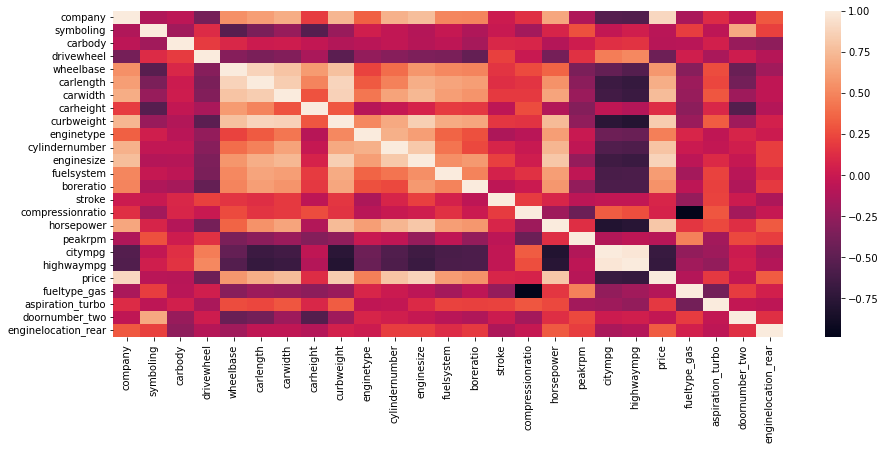

In [319]:
# Heatmap of Correlation
plt.figure(figsize=(15,6))
sns.heatmap(df.corr())

# Important Features by looking into Correlation(After Feature Engineering)
    * company(0.89), drivewheel(-0.43), wheelbase(0.57), carlength(0.68), carwidth(0.75), curbweight(0.83),
      enginetype(0.47), cylindernumber(0.79), enginesize(0.87), fuelsystem(0.59), boreratio(0.55),
      horsepower(0.80), citympg(-0.68), highwaympg(-0.69), enginelocation_rear(0.32)

### Scaling the Data(Only Features)

In [320]:
# Split the data into Feature and Target Variables
x= df.drop(columns=['price'], axis=1)
y= df['price']

In [321]:
# Import StandardScaler from preprocessing
from sklearn.preprocessing import StandardScaler

# Make scalar object
scaler = StandardScaler()

#Fit the Features
scaled_x= scaler.fit_transform(x)

In [322]:
# Scaled Feature DataFrame
scaled_x_df= pd.DataFrame(scaled_x, columns= ['symboling', 'company', 'carbody', 'drivewheel', 'wheelbase', 'carlength',
                                              'carwidth','carheight', 'curbweight', 'enginetype', 'cylindernumber',
                                              'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 
                                              'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueltype_gas', 
                                              'aspiration_turbo', 'doornumber_two', 'enginelocation_rear'])

In [323]:
# Scaled Dataframe
scaled_df= pd.concat([scaled_x_df, df.price], axis=1)

### Feature Selection using RFE(Recursive Feature Elimination)

In [325]:
# Split the Scaled Data into Feature and Target Variables
x= scaled_df.drop(columns=['price'], axis=1)
y= scaled_df['price']

In [326]:
# Split the Dataset into Train & Test set
x_train, x_test, y_train, y_test= train_test_split(x,
                                                   y, 
                                                   test_size=0.2, 
                                                   random_state=101)

In [327]:
# RFE to select top n features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [328]:
lm = LinearRegression()
lm.fit(x_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(x_train, y_train)

In [329]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('symboling', True, 1),
 ('company', True, 1),
 ('carbody', False, 14),
 ('drivewheel', False, 15),
 ('wheelbase', True, 1),
 ('carlength', False, 6),
 ('carwidth', False, 11),
 ('carheight', False, 12),
 ('curbweight', True, 1),
 ('enginetype', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('fuelsystem', False, 8),
 ('boreratio', False, 9),
 ('stroke', False, 5),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', False, 4),
 ('citympg', False, 3),
 ('highwaympg', False, 10),
 ('fueltype_gas', False, 2),
 ('aspiration_turbo', False, 7),
 ('doornumber_two', False, 13),
 ('enginelocation_rear', True, 1)]

In [330]:
x_train.columns[rfe.support_]

Index(['symboling', 'company', 'wheelbase', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'compressionratio', 'horsepower',
       'enginelocation_rear'],
      dtype='object')

# Checking for P-Value & RFE:

In [331]:
x_train_rfe = x_train[x_train.columns[rfe.support_]]

In [332]:
x_train_rfe.head(1)

,symboling,company,wheelbase,curbweight,enginetype,cylindernumber,enginesize,compressionratio,horsepower,enginelocation_rear
154,-0.475135,-0.671472,-0.508831,-0.511285,-0.454206,-0.470742,-0.84031,-0.288349,-1.067671,-0.121867


In [333]:
# Function to build StatsModel using OLS:-
def make_model(x,y):
    x = sm.add_constant(x) #Adding the constant
    lm = sm.OLS(y,x).fit() # fitting the model
    print(lm.summary()) # model summary
    return x

#Function to check VIF:-
def check_VIF(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

# 1st Model:-

In [334]:
x_train_new = make_model(x_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     210.9
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           3.92e-84
Time:                        17:59:34   Log-Likelihood:                -1492.0
No. Observations:                 164   AIC:                             3006.
Df Residuals:                     153   BIC:                             3040.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.329e+04    

In [335]:
#Calculating the Variance Inflation Factor(VIF)
check_VIF(x_train_new)

,Features,VIF
4,curbweight,9.71
7,enginesize,7.00
9,horsepower,5.63
3,wheelbase,5.01
6,cylindernumber,4.48
1,symboling,3.51
5,enginetype,2.35
10,enginelocation_rear,1.63
2,company,1.62
8,compressionratio,1.46


#### compressionratio has P-Value > P(t), so lets drop it.
#### curbweight has highest VIF, so lets drop it.

In [336]:
x_train_new = x_train_rfe.drop(["compressionratio", "curbweight"], axis = 1)

# 2nd Model:-

In [337]:
x_train_new = make_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     258.4
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           1.59e-85
Time:                        17:59:40   Log-Likelihood:                -1494.5
No. Observations:                 164   AIC:                             3007.
Df Residuals:                     155   BIC:                             3035.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.331e+04    

In [338]:
#Calculating the Variance Inflation Factor(VIF)
check_VIF(x_train_new)

,Features,VIF
6,enginesize,6.08
5,cylindernumber,4.38
7,horsepower,3.58
1,symboling,3.37
3,wheelbase,2.82
4,enginetype,2.33
2,company,1.60
8,enginelocation_rear,1.57
0,const,1.01


### enginesize has VIF = 6.08 > 5, so let's drop it.

In [339]:
x_train_new = x_train_new.drop(["enginesize"], axis = 1)

In [340]:
x_train_new = make_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     279.8
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           7.02e-85
Time:                        17:59:49   Log-Likelihood:                -1499.1
No. Observations:                 164   AIC:                             3014.
Df Residuals:                     156   BIC:                             3039.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.331e+04    

In [341]:
#Calculating the Variance Inflation Factor(VIF)
check_VIF(x_train_new)

,Features,VIF
5,cylindernumber,3.78
1,symboling,3.21
6,horsepower,2.89
3,wheelbase,2.48
4,enginetype,2.28
2,company,1.59
7,enginelocation_rear,1.56
0,const,1.01


### enginetype has P- Value > P(t), so let's drop it.

In [342]:
x_train_new = x_train_new.drop(["enginetype"], axis = 1)

In [343]:
x_train_new = make_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     321.5
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           1.80e-85
Time:                        17:59:56   Log-Likelihood:                -1500.8
No. Observations:                 164   AIC:                             3016.
Df Residuals:                     157   BIC:                             3037.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.331e+04    

In [344]:
#Calculating the Variance Inflation Factor(VIF)
check_VIF(x_train_new)

,Features,VIF
1,symboling,2.98
4,cylindernumber,2.74
5,horsepower,2.58
3,wheelbase,2.48
2,company,1.59
6,enginelocation_rear,1.51
0,const,1.01


# Model Building:-

# Simple Linear Regression
    * I have Choosen company as best Variable

In [345]:
# Split the Scaled Data into Feature and Target Variables
x= scaled_df[['horsepower']]
y= scaled_df['price']

In [346]:
x_train, x_test, y_train, y_test= train_test_split(x,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=101)

In [347]:
print("X_train: ", x_train.shape)
print("X_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (164, 1)
X_test:  (41, 1)
y_train:  (164,)
y_test:  (41,)


In [348]:
# Define model
slr = LinearRegression()

In [349]:
#Train the model
slr.fit(x_train,y_train)

LinearRegression()

In [350]:
# Predict the data
y_pred_slr = slr.predict(x_test)

In [351]:
# Evalute the models
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('mean_absolute_error:', mean_absolute_error(y_pred_slr,y_test))
print('mean_squared_error', mean_squared_error(y_pred_slr,y_test))
print('r2_score', r2_score(y_pred_slr,y_test))

mean_absolute_error: 2722.7419504803456
mean_squared_error 13166537.535050912
r2_score 0.49817895772980725


### r2_score for Simple Linear Regression comes out to be 0.49, when horsepower is choosen as best variable.

Text(0, 0.5, 'y_pred_slr')

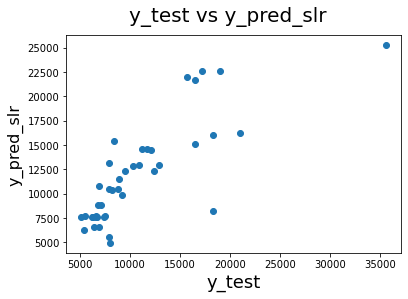

In [352]:
# Plotting y_test and y_pred_slr to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_slr)
fig.suptitle('y_test vs y_pred_slr', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_slr', fontsize=16) 

### K-Fold Cross Validation:-

In [353]:
# Importing the KFold Library
from sklearn.model_selection import KFold

# Select your Model
model= slr

# How many times training and testing will occur
kfold_validation= KFold(10)

In [354]:
# Import cross value score
from sklearn.model_selection import cross_val_score

# Calculate cross val replort
slr_results= cross_val_score(model, x,y, cv=kfold_validation)

print(slr_results)
print('Minimum Accuracy:',np.min(slr_results))
print('Maximum Accuracy:',np.max(slr_results))
print('Mean Accuracy:',np.mean(slr_results))

[ 0.53902281 -0.66985375  0.87833829  0.32393466 -0.88135652  0.10262015
  0.84528792 -0.13232126 -1.3339154   0.31471638]
Minimum Accuracy: -1.333915396110648
Maximum Accuracy: 0.8783382877119196
Mean Accuracy: -0.0013526726540523115


# Multiple Linear Regression

In [355]:
x= scaled_df[['symboling', 'cylindernumber', 'horsepower', 'wheelbase', 'company', 'enginelocation_rear']]
y= scaled_df['price']

In [356]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=101)

In [357]:
print("X_train: ", x_train.shape)
print("X_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (164, 6)
X_test:  (41, 6)
y_train:  (164,)
y_test:  (41,)


In [358]:
# Define model
mlr = LinearRegression()

In [359]:
#Train the model
mlr.fit(x_train,y_train)

LinearRegression()

In [360]:
# Predict the data
y_pred_mlr = mlr.predict(x_test)

In [361]:
# Evalute the models

print('mean_absolute_error:', mean_absolute_error(y_pred_mlr,y_test))
print('mean_squared_error', mean_squared_error(y_pred_mlr,y_test))
print('r2_score', r2_score(y_pred_mlr,y_test))

mean_absolute_error: 1578.2762499720095
mean_squared_error 4842878.209216193
r2_score 0.8443714446749959


Text(0, 0.5, 'y_pred_mlr')

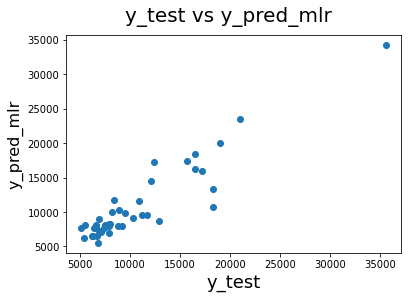

In [362]:
# Plotting y_test and y_pred_mlr to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_mlr)
fig.suptitle('y_test vs y_pred_mlr', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_mlr', fontsize=16) 

### K-Fold Cross Validation:-

In [363]:
# Select your Model
model= mlr

# How many times training and testing will occur
kfold_validation= KFold(10)

In [364]:
# Calculate cross val replort
mlr_results= cross_val_score(model, x,y, cv=kfold_validation)

print(mlr_results)
print('Minimum Accuracy:',np.min(mlr_results))
print('Maximum Accuracy:',np.max(mlr_results))
print('Mean Accuracy:',np.mean(mlr_results))

[0.75927374 0.54344005 0.96975202 0.91222522 0.68260778 0.75345018
 0.9143491  0.41940437 0.45450971 0.77301758]
Minimum Accuracy: 0.4194043681665456
Maximum Accuracy: 0.9697520248706353
Mean Accuracy: 0.7182029739925818


Text(0.5, 1.0, 'cylindernumber Histogram')

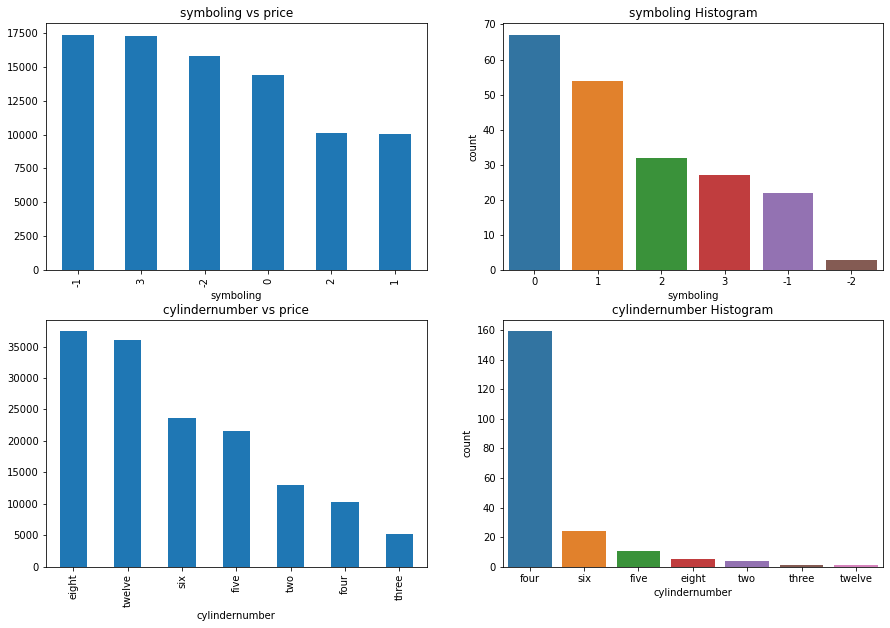

In [409]:
plt.figure(figsize=(15, 10))

# Visualizing symboling
plt.subplot(2,2,1)
df1.groupby(['symboling'])['price'].mean().sort_values(ascending = False).plot.bar()
plt.title('symboling vs price')

plt.subplot(2,2,2)
sns.countplot(df1.symboling, order = df1.symboling.value_counts().index)
plt.title('symboling Histogram')
#------------------------------------------------------------------------------------------------
# Visualizing cylindernumber
plt.subplot(2,2,3)
df1.groupby(['cylindernumber'])['price'].mean().sort_values(ascending = False).plot.bar()
plt.title('cylindernumber vs price')

plt.subplot(2,2,4)
sns.countplot(df1.cylindernumber, order = df1.cylindernumber.value_counts().index)
plt.title('cylindernumber Histogram')

Text(0.5, 1.0, 'horsepower Histogram')

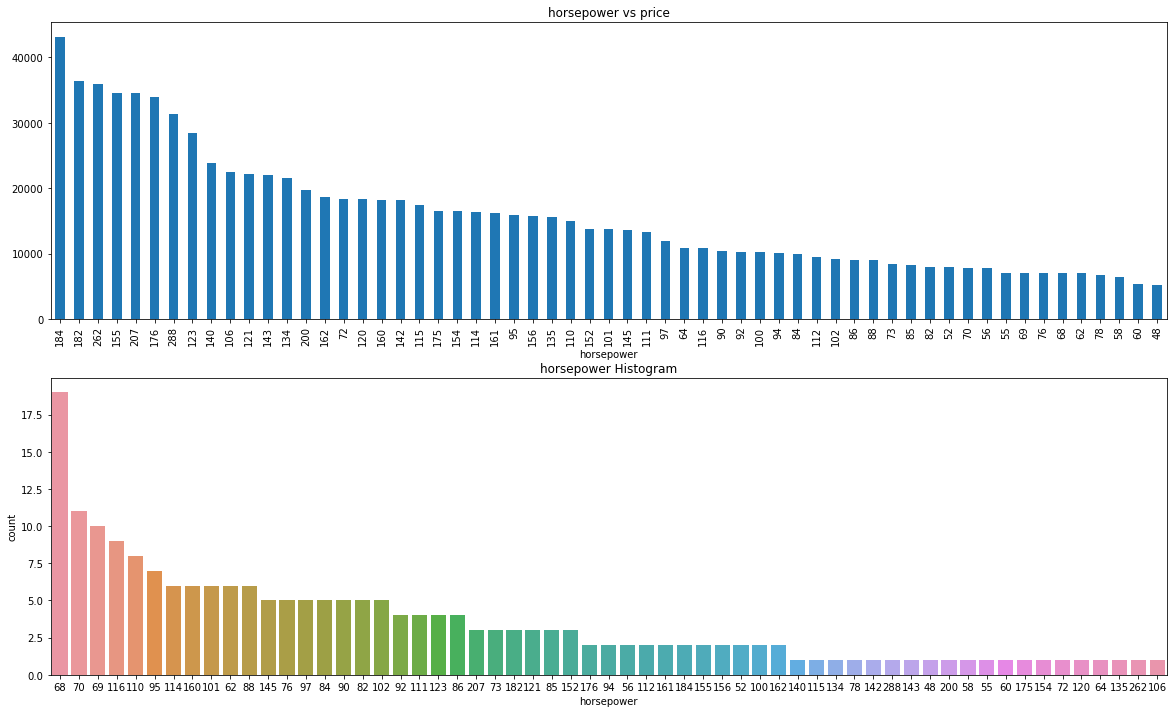

In [413]:
plt.figure(figsize=(20, 12))

# Visualizing horsepower
plt.subplot(2,1,1)
df1.groupby(['horsepower'])['price'].mean().sort_values(ascending = False).plot.bar()
plt.title('horsepower vs price')

plt.subplot(2,1,2)
sns.countplot(df1.horsepower, order = df1.horsepower.value_counts().index)
plt.title('horsepower Histogram')

Text(0.5, 1.0, 'wheelbase Histogram')

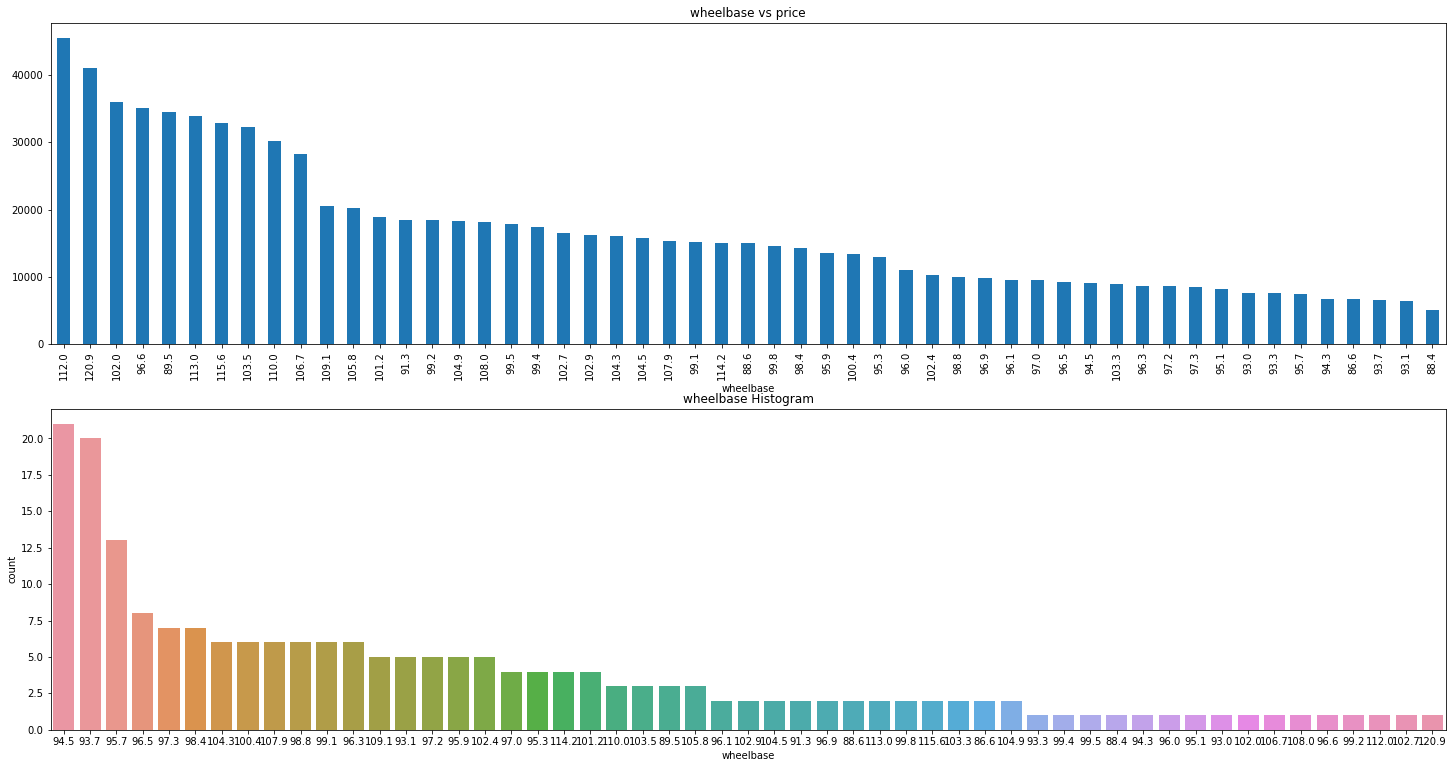

In [417]:
plt.figure(figsize=(25, 13))

# Visualizing horsepower
plt.subplot(2,1,1)
df1.groupby(['wheelbase'])['price'].mean().sort_values(ascending = False).plot.bar()
plt.title('wheelbase vs price')

plt.subplot(2,1,2)
sns.countplot(df1.wheelbase, order = df1.wheelbase.value_counts().index)
plt.title('wheelbase Histogram')

Text(0.5, 1.0, 'company Histogram')

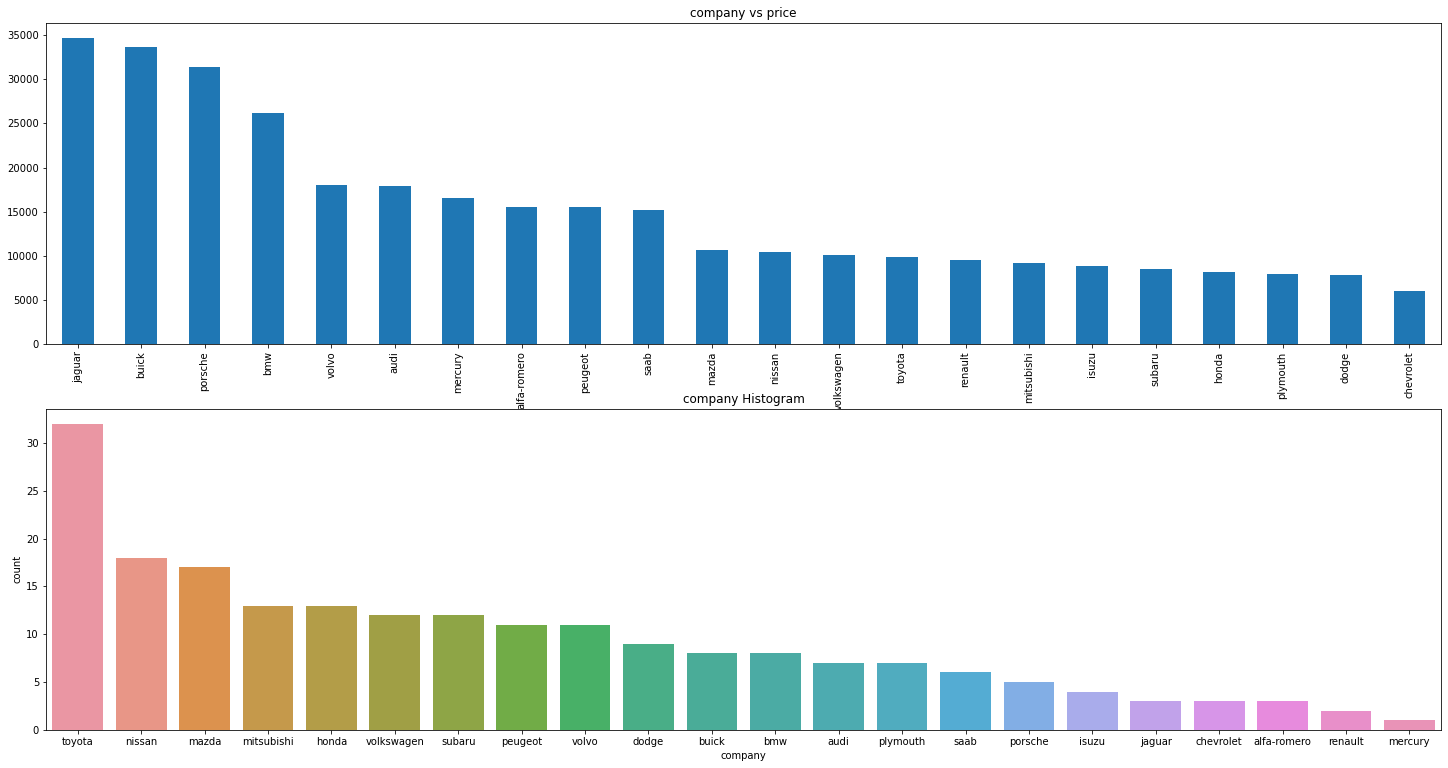

In [419]:
plt.figure(figsize=(25, 13))

# Visualizing horsepower
plt.subplot(2,1,1)
df1.groupby(['company'])['price'].mean().sort_values(ascending = False).plot.bar()
plt.title('company vs price')

plt.subplot(2,1,2)
sns.countplot(df1.company, order = df1.company.value_counts().index)
plt.title('company Histogram')

Text(0.5, 1.0, 'enginelocation Histogram')

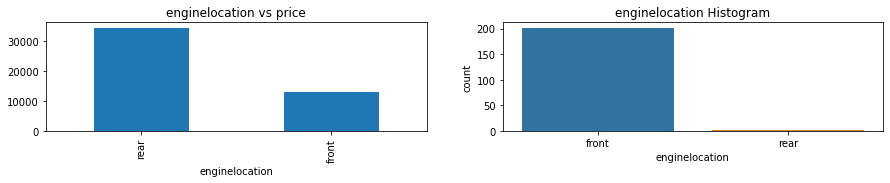

In [426]:
plt.figure(figsize=(15, 2))

# Visualizing horsepower
plt.subplot(1,2,1)
df1.groupby(['enginelocation'])['price'].mean().sort_values(ascending = False).plot.bar()
plt.title('enginelocation vs price')

plt.subplot(1,2,2)
sns.countplot(df1.enginelocation, order = df1.enginelocation.value_counts().index)
plt.title('enginelocation Histogram')

# Final Interpretation:-
### * r2_score of Multiple Linear Regression comes out to be 0.84, which is not best but optimal.
### * Accuracy of the Multiple Linear Regression through 10-Fold Cross Validation comes out to be 0.71
### * Minimmum & Maximum Accuracy of MLR though 10-Fold Cross Validation is 0.41 & 0.96 respectively.
### * Factors that drive price(Based on RFE, P-Value & VIF ) are as follows:-
    1. symboling:- risk factor is important for pricing  as car with -1 risk factor are highest priced & 
                   car with 0 risk factor have highest frequency. 
    2. cylindernumber:- More the number of cylinders, more will be the price.(exception: price of 12 cylinder < 8 cylinders)
    3. horsepower:- More the HP more should be the price, but we have kind of exceptional distribution for HP which 
                    influence the price accordingly.
    4. wheelbase:- Price is unevenly distributed accross the wheelbase which drive the price (We Can't say- More the 
                   wheelbase more will be the price)
    5. company:- A well known feature to drive the price. 
    6. enginelocation:- Rear Engine have high price while Front Engines are sold most, So it plays important factor 
                        to establishing the Price.